In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


/home/enigma/.local/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/home/enigma/.local/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/home/enigma/.local/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/home/enigma/.local/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/home/enigma/.local/lib/python2.7/site-packages/pandas/core/indexes/base.py:7: RuntimeWarni

In [2]:
books = pd.read_csv('/home/enigma/BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('/home/enigma/BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('/home/enigma/BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 8 fields, saw 9
Skipping line 251296: expected 8 fields, saw 9
Skipping line 259941: expected 8 fields, saw 9
Skipping line 261529: expected 8 fields, saw 9

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (3) h

In [3]:
print(ratings.shape)
print(ratings.columns)

(1149780, 3)
Index([u'userID', u'ISBN', u'bookRating'], dtype='object')


In [4]:
users.isnull().sum()

userID           0
Location         0
Age         110762
dtype: int64

In [5]:
ratings.isnull().sum()

userID        0
ISBN          0
bookRating    0
dtype: int64

In [6]:
books.isnull().sum() #normal distribution curve

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
imageUrlS            0
imageUrlM            0
imageUrlL            3
dtype: int64

In [7]:
books=books.dropna()

In [8]:
books.isnull().sum()

ISBN                 0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            0
imageUrlS            0
imageUrlM            0
imageUrlL            0
dtype: int64

In [9]:
users=users.dropna()
ratings = ratings.dropna()

In [10]:
print(users.isnull().sum())
print(ratings.isnull().sum())

userID      0
Location    0
Age         0
dtype: int64
userID        0
ISBN          0
bookRating    0
dtype: int64


In [11]:
print sorted(users.Age.unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0, 228

In [12]:
users.loc[(users.Age >90) | (users.Age<5),'Age']=np.nan

In [13]:
users.Age=users.Age.fillna(users.Age.mean())
users.Age=users.Age.astype(np.int32)
print sorted(users.Age.unique())

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [14]:
ratings_new=ratings[ratings.ISBN.isin(books.ISBN)]
ratings_new=ratings_new[ratings.userID.isin(users.userID)]
#ratings dataset should have userID and ISBN  which exist in respective tables i.e. book and users

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [15]:
print ratings.shape
print ratings_new.shape

(1149780, 3)
(753296, 3)


In [16]:
ratings_new.head(5)

,userID,ISBN,bookRating
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
16,276747,0060517794,9


In [17]:
ratings_explicit=ratings_new[ratings_new.bookRating!=0]
ratings_implicit=ratings_new[ratings_new.bookRating==0]


/home/enigma/.local/lib/python2.7/site-packages/scipy/special/__init__.py:640: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ufuncs import *
/home/enigma/.local/lib/python2.7/site-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/home/enigma/.local/lib/python2.7/site-packages/scipy/linalg/__init__.py:207: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._decomp_update import *
/home/enigma/.local/lib/python2.7/site-packages/scipy/special/_ellip_harm.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ellip_harm_2 import _ellipsoid, _ellipsoid_norm
/home/enigma/.local/lib/python2.7/site-packages/scipy/interpolate/_bsplines.py:10: RuntimeWarning: numpy.dtype size changed, may indicate b

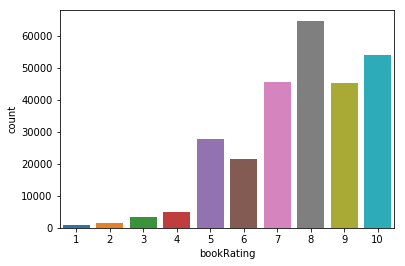

In [18]:
import seaborn as sb
sb.countplot(data=ratings_explicit, x='bookRating')
plt.show()

In [19]:
rating_user_books = pd.merge(pd.merge(ratings, users, on='userID'),books,on='ISBN')

In [20]:
rating_user_books =  rating_user_books.drop(['imageUrlS'],axis=1)


In [21]:
# removing special characters form the dataframe
import re
rating_user_books.publisher.apply(' '.join).str.replace('[^A-Za-z\s]+', '') \
           .str.split(expand=False)

0                         [W, a, r, n, e, r, B, o, o, k, s]
1                         [W, a, r, n, e, r, B, o, o, k, s]
2                         [W, a, r, n, e, r, B, o, o, k, s]
3                         [W, a, r, n, e, r, B, o, o, k, s]
4                         [W, a, r, n, e, r, B, o, o, k, s]
5                         [W, a, r, n, e, r, B, o, o, k, s]
6                         [W, a, r, n, e, r, B, o, o, k, s]
7                         [W, a, r, n, e, r, B, o, o, k, s]
8                         [W, a, r, n, e, r, B, o, o, k, s]
9                         [W, a, r, n, e, r, B, o, o, k, s]
10                        [W, a, r, n, e, r, B, o, o, k, s]
11                        [W, a, r, n, e, r, B, o, o, k, s]
12                        [W, a, r, n, e, r, B, o, o, k, s]
13                        [W, a, r, n, e, r, B, o, o, k, s]
14                        [W, a, r, n, e, r, B, o, o, k, s]
15                        [W, a, r, n, e, r, B, o, o, k, s]
16                        [W, a, r, n, e

In [22]:
rating_user_books.Location.apply(' '.join).str.replace('[^A-Za-z\s]+', '') \
           .str.split(expand=False)

0         [h, n, e, w, s, o, u, t, h, w, a, l, e, s, a, ...
1         [s, a, n, d, i, e, g, o, c, a, l, i, f, o, r, ...
2         [k, n, o, x, v, i, l, l, e, t, e, n, n, e, s, ...
3          [o, m, a, h, a, n, e, b, r, a, s, k, a, u, s, a]
4          [t, u, l, s, a, o, k, l, a, h, o, m, a, u, s, a]
5         [m, o, n, c, k, s, c, o, r, n, e, r, s, o, u, ...
6         [r, o, y, a, l, o, a, k, m, i, c, h, i, g, a, ...
7         [s, t, l, o, u, i, s, m, i, s, s, o, u, r, i, ...
8         [m, o, u, n, t, a, i, n, v, i, e, w, c, a, l, ...
9         [b, e, a, v, e, r, t, o, n, o, n, t, a, r, i, ...
10        [s, o, u, t, h, o, h, i, o, n, o, v, a, s, c, ...
11        [m, o, r, r, i, s, c, o, n, n, e, c, t, i, c, ...
12        [m, a, n, c, h, e, s, t, e, r, m, i, s, s, o, ...
13        [s, y, d, n, e, y, n, e, w, s, o, u, t, h, w, ...
14        [b, a, r, n, h, a, r, t, m, i, s, s, o, u, r, ...
15        [b, o, n, n, n, o, r, d, r, h, e, i, n, w, e, ...
16        [l, o, n, d, o, n, l, o, n, d,

In [23]:
rating_user_books.bookAuthor.apply(' '.join).str.replace('[^A-Za-z\s]+', '') 


0                 N i c h o l a s   S p a r k s
1                 N i c h o l a s   S p a r k s
2                 N i c h o l a s   S p a r k s
3                 N i c h o l a s   S p a r k s
4                 N i c h o l a s   S p a r k s
5                 N i c h o l a s   S p a r k s
6                 N i c h o l a s   S p a r k s
7                 N i c h o l a s   S p a r k s
8                 N i c h o l a s   S p a r k s
9                 N i c h o l a s   S p a r k s
10                N i c h o l a s   S p a r k s
11                N i c h o l a s   S p a r k s
12                N i c h o l a s   S p a r k s
13                N i c h o l a s   S p a r k s
14                N i c h o l a s   S p a r k s
15                N i c h o l a s   S p a r k s
16                N i c h o l a s   S p a r k s
17                N i c h o l a s   S p a r k s
18                N i c h o l a s   S p a r k s
19                N i c h o l a s   S p a r k s
20                N i c h o l a s   S p 

In [24]:
rating_user_books.head()

,userID,ISBN,bookRating,Location,Age,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlM,imageUrlL
0,276727,0446520802,0,"h, new south wales, australia",16,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
1,638,0446520802,0,"san diego, california, usa",20,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
2,3363,0446520802,0,"knoxville, tennessee, usa",29,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,7158,0446520802,10,"omaha, nebraska, usa",30,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
4,8253,0446520802,10,"tulsa, oklahoma, usa",26,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...


In [25]:
rating_user_books.columns

Index([u'userID', u'ISBN', u'bookRating', u'Location', u'Age', u'bookTitle',
       u'bookAuthor', u'yearOfPublication', u'publisher', u'imageUrlM',
       u'imageUrlL'],
      dtype='object')

In [26]:
rating_user_books = rating_user_books.drop(['imageUrlM'], axis=1)

In [27]:
rating_user_books.columns

Index([u'userID', u'ISBN', u'bookRating', u'Location', u'Age', u'bookTitle',
       u'bookAuthor', u'yearOfPublication', u'publisher', u'imageUrlL'],
      dtype='object')

In [28]:
rating_user_books = rating_user_books.drop(['imageUrlL'], axis=1)

In [29]:
rating_user_books.head()

,userID,ISBN,bookRating,Location,Age,bookTitle,bookAuthor,yearOfPublication,publisher
0,276727,0446520802,0,"h, new south wales, australia",16,The Notebook,Nicholas Sparks,1996,Warner Books
1,638,0446520802,0,"san diego, california, usa",20,The Notebook,Nicholas Sparks,1996,Warner Books
2,3363,0446520802,0,"knoxville, tennessee, usa",29,The Notebook,Nicholas Sparks,1996,Warner Books
3,7158,0446520802,10,"omaha, nebraska, usa",30,The Notebook,Nicholas Sparks,1996,Warner Books
4,8253,0446520802,10,"tulsa, oklahoma, usa",26,The Notebook,Nicholas Sparks,1996,Warner Books


In [30]:
rating_user_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753296 entries, 0 to 753295
Data columns (total 9 columns):
userID               753296 non-null int64
ISBN                 753296 non-null object
bookRating           753296 non-null int64
Location             753296 non-null object
Age                  753296 non-null int32
bookTitle            753296 non-null object
bookAuthor           753296 non-null object
yearOfPublication    753296 non-null object
publisher            753296 non-null object
dtypes: int32(1), int64(2), object(6)
memory usage: 54.6+ MB


In [31]:
def uniqueValues(listName, columnName, dataFrame):
    for data in dataFrame[columnName]:
        if data not in listName:
            listName.append(data)
    return listName
#convert all the objects to int by state mapping
def stateMapping(listName, dictionaryName, columnName, dataFrame):
    for state in range(0,len(listName)):
        dictionaryName[listName[state]]=state
    dataFrame[columnName]=dataFrame[columnName].map(dictionaryName)
    
# unique values for ISBN, Location, BookTitle, BookAuthor, YearOfPublication, Publisher

unique_ISBN = []
unique_Location = []
unique_BookTitle = []
unique_BookAuthor = []
unique_YearOfPublication = []
unique_Publisher = []

uniqueValues(unique_ISBN, 'ISBN', rating_user_books)

[u'0446520802',
 u'052165615X',
 u'0521795028',
 u'2080674722',
 u'0060517794',
 u'0451192001',
 u'0609801279',
 u'0671537458',
 u'0679776818',
 u'0943066433',
 u'1570231028',
 u'1885408226',
 u'0747558167',
 u'0684867621',
 u'0451166892',
 u'034544003X',
 u'0380000059',
 u'0380711524',
 u'0451167317',
 u'0451454952',
 u'0843920262',
 u'3404122879',
 u'3404182928',
 u'3426690179',
 u'3442424216',
 u'3442425573',
 u'3453092007',
 u'3453176944',
 u'3453185137',
 u'3453877241',
 u'3517017442',
 u'3596125006',
 u'0099543818',
 u'3404147723',
 u'3423111321',
 u'3442136644',
 u'3492232000',
 u'8434811634',
 u'842333533X',
 u'8433914456',
 u'8437606322',
 u'8445072919',
 u'847765011X',
 u'8478442588',
 u'0330332775',
 u'0006379702',
 u'3423084049',
 u'3442131340',
 u'3446202102',
 u'3453073398',
 u'3453115783',
 u'3499134004',
 u'349915398X',
 u'3548603203',
 u'3764501383',
 u'3791535889',
 u'0061054143',
 u'0061054151',
 u'0061056774',
 u'0671021346',
 u'0671024108',
 u'1562827898',
 u'00644

In [34]:
uniqueValues(unique_Location, 'Location', rating_user_books)

[u'h, new south wales, australia',
 u'san diego, california, usa',
 u'knoxville, tennessee, usa',
 u'omaha, nebraska, usa',
 u'tulsa, oklahoma, usa',
 u'moncks corner, south carolina, usa',
 u'royal oak, michigan, usa',
 u'st. louis, missouri, usa',
 u'mountain view, california, usa',
 u'beaverton, ontario, canada',
 u'south ohio, nova scotia, canada',
 u'morris, connecticut, usa',
 u'manchester, missouri, usa',
 u'sydney, new south wales, australia',
 u'barnhart, missouri, usa',
 u'bonn, nordrhein-westfalen, germany',
 u'london, london, united kingdom',
 u'buffalo, new york, usa',
 u'farnborough, england, united kingdom',
 u'forty fort, , usa',
 u'chesapeake, virginia, usa',
 u'portland, oregon, usa',
 u'olympia, washington, usa',
 u'burgettstown, pennsylvania, usa',
 u'oakland, california, usa',
 u'franklin, virginia, usa',
 u'powhatan, virginia, usa',
 u'templeton, pennsylvania, usa',
 u'lansdale, pennsylvania, usa',
 u'summerville, south carolina, usa',
 u'cheadle heath, england, u

In [35]:
uniqueValues(unique_BookTitle, 'bookTitle', rating_user_books)

[u'The Notebook',
 u'Help!: Level 1',
 u'The Amsterdam Connection : Level 4 (Cambridge English Readers)',
 u'Les Particules Elementaires',
 u'Little Altars Everywhere',
 u'How Stella Got Her Groove Back',
 u'The Law of Love',
 u'Waiting to Exhale',
 u'Birdsong: A Novel of Love and War',
 u'How to Deal With Difficult People',
 u'Change Your Job, Change Your Life: High Impact Strategies for Finding Great Jobs in the Decade Ahead (Change Your Job Change Your Life, 7th ed)',
 u'The Golden Rule of Schmoozing',
 u'Apricots on the Nile: A Memoir with Recipes',
 u'The Girl Who Loved Tom Gordon : A Novel',
 u'The Pillars of the Earth',
 u'Southampton Row (Charlotte &amp; Thomas Pitt Novels (Hardcover))',
 u'CLOUT',
 u'See Jane Run',
 u'The Dark Half',
 u'House of the Sun (Shadowrun)',
 u'God Game',
 u'Vater Himmel, Mutter Erde.',
 u'Besiegt vom Sturm der Leidenschaft.',
 u'Sturm der Liebe.',
 u'Ich, Prinzessin aus dem Hause Al Saud. Ein Leben hinter tausend Schleiern.',
 u'Der Bronzeh\xc3?\xc2\

In [36]:
uniqueValues(unique_BookAuthor, 'bookAuthor', rating_user_books)

[u'Nicholas Sparks',
 u'Philip Prowse',
 u'Sue Leather',
 u'Michel Houellebecq',
 u'Rebecca Wells',
 u'Terry McMillan',
 u'Laura Esquivel',
 u'Sebastian Faulks',
 u'Rick Brinkman',
 u'Ronald L. Krannich',
 u'Aye Jaye',
 u'Colette Rossant',
 u'Stephen King',
 u'Ken Follett',
 u'Anne Perry',
 u'D. GIBBONS',
 u'Joy Fielding',
 u'Fanpro',
 u'Ralph Hayes',
 u'Sue Harrison',
 u'Patricia Potter',
 u'Rosemary Rogers',
 u'Jean P. Sasson',
 u'Hanns Kneifel',
 u'Dean Koontz',
 u'Susan King',
 u'Gayle Feyrer',
 u'Antonia Rados',
 u'Heidelore Kluge',
 u'Maria Nurowska',
 u'Salman Rushdie',
 u'Patrice Leavold',
 u'Fay Weldon',
 u'Allen Carr',
 u'Gaby Hauptmann',
 u'Maria Gripe',
 u'Edith Wharton',
 u'Fernando Savater',
 u'Leo Tolstoy',
 u'J. R. R. Tolkien',
 u'Eglal Errera',
 u'Tanazaki',
 u'Helen Fielding',
 u'William Shatner',
 u'Michael Ondaatje',
 u'Patricia Cornwell',
 u'Jostein Gaarder',
 u'Terry Pratchett',
 u'Tom Clancy',
 u'John Updike',
 u'Eoin Colfer',
 u'Waris Dirie',
 u'Herman Melville'

In [37]:
uniqueValues(unique_YearOfPublication, 'yearOfPublication', rating_user_books)

[1996,
 u'1999',
 u'2001',
 1998,
 2003,
 1997,
 1995,
 u'1995',
 1999,
 u'1998',
 2002,
 u'2024',
 1992,
 1994,
 u'1983',
 u'2002',
 2001,
 u'1996',
 u'2000',
 u'1989',
 u'2003',
 u'1991',
 1993,
 0,
 u'1994',
 1976,
 u'1993',
 1991,
 u'0',
 2000,
 1983,
 1990,
 1981,
 u'1988',
 1989,
 u'1990',
 u'1997',
 2004,
 1984,
 1988,
 u'1982',
 u'1985',
 1985,
 1982,
 1979,
 u'2004',
 u'1984',
 1974,
 1987,
 u'1979',
 1977,
 1965,
 1972,
 1986,
 u'1992',
 u'1986',
 u'1981',
 1962,
 u'1980',
 1957,
 1958,
 1960,
 1963,
 1969,
 u'1974',
 1978,
 1970,
 u'1972',
 1980,
 u'1975',
 1959,
 u'1960',
 1968,
 u'1976',
 u'1978',
 u'1970',
 u'1971',
 u'1977',
 u'1987',
 1975,
 1973,
 u'1950',
 u'1969',
 1971,
 1955,
 u'1911',
 1952,
 1946,
 1954,
 1966,
 1920,
 1967,
 1942,
 1951,
 1948,
 1964,
 u'1959',
 1950,
 2005,
 1961,
 1943,
 1953,
 1956,
 1941,
 1937,
 1940,
 u'1965',
 1930,
 1923,
 1945,
 1947,
 1936,
 2011,
 u'1973',
 1925,
 2020,
 1939,
 1938,
 2030,
 1911,
 1949,
 1932,
 1929,
 u'1953',
 1927,

In [38]:
uniqueValues(unique_Publisher, 'publisher', rating_user_books)

[u'Warner Books',
 u'Cambridge University Press',
 u'Flammarion',
 u'HarperTorch',
 u'Signet Book',
 u'Three Rivers Press (CA)',
 u'Pocket',
 u'Vintage Books USA',
 u'Careertrack Inc.',
 u'Impact Publications',
 u'Listen &amp; Live Audio',
 u'Bloomsbury Publishing Plc',
 u'Scribner',
 u'Ballantine Books',
 u'Avon',
 u'Fanpro',
 u'Ingram Book Co',
 u'L\xc3?\xc2\xbcbbe',
 u'Droemer Knaur',
 u'Goldmann',
 u'Heyne',
 u'S\xc3?\xc2\xbcdwest-Verlag',
 u'Fischer (Tb.), Frankfurt',
 u'Vintage Books',
 u'Dtv',
 u'Piper',
 u'S &amp; M Books',
 u'Planeta Pub Corp',
 u'Anagrama',
 u'Ediciones Catedra S.A.',
 u'Minotauro',
 u'Circe',
 u'Siruela',
 u'Picador (UK)',
 u'HarperCollins Publishers',
 u'Deutscher Taschenbuch Verlag (DTV)',
 u'Hanser Belletristik',
 u'Rowohlt Tb.',
 u'Ullstein TB-Vlg',
 u'Blanvalet Verlag GmbH',
 u'Dressler Verlag',
 u'HarperEntertainment',
 u'Simon Spotlight Entertainment',
 u'Hyperion Books',
 u'HarperTrophy',
 u'Scholastic Inc',
 u'Yearling',
 u'Mariner Books',
 u'Downto

In [39]:
#creating empty dictionaries for every list of unique values we created
ISBN_mapping = dict()
Location_mapping = dict()
BookTitle_mapping = dict()
BookAuthor_mapping = dict()
YOP_mapping = dict()
Publisher_mapping = dict()

stateMapping(unique_ISBN, ISBN_mapping, 'ISBN', rating_user_books)
stateMapping(unique_Location, Location_mapping, 'Location', rating_user_books)
stateMapping(unique_BookTitle, BookTitle_mapping, 'bookTitle', rating_user_books)
stateMapping(unique_BookAuthor, BookAuthor_mapping, 'bookAuthor', rating_user_books)
stateMapping(unique_YearOfPublication, YOP_mapping, 'yearOfPublication', rating_user_books)
stateMapping(unique_Publisher, Publisher_mapping, 'publisher', rating_user_books)

In [40]:
rating_user_books.to_csv('all-merged.csv', sep=';', error_bad_lines=False, encoding="latin-1")

TypeError: to_csv() got an unexpected keyword argument 'error_bad_lines'

In [45]:
rating_user_books.to_csv('all-merged.csv', sep=';',encoding="latin-1")

In [46]:
rani = pd.read_csv('all-merged.csv', sep=';', encoding="latin-1")

,Unnamed: 0,userID,ISBN,bookRating,Location,Age,bookTitle,bookAuthor,yearOfPublication,publisher
0,0,276727,0,0,0,16,0,0,0,0
1,1,638,0,0,1,20,0,0,0,0
2,2,3363,0,0,2,29,0,0,0,0
3,3,7158,0,10,3,30,0,0,0,0
4,4,8253,0,10,4,26,0,0,0,0
5,5,9939,0,0,5,17,0,0,0,0
6,6,19371,0,4,6,52,0,0,0,0
7,7,23768,0,6,7,45,0,0,0,0
8,8,26525,0,10,8,56,0,0,0,0
9,9,27617,0,9,9,32,0,0,0,0
